<a href="https://colab.research.google.com/github/Renator12/Restaurant-Datascience/blob/main/RESTAURANTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import json

In [2]:
def getapikey():
  key=input('Enter your api key')
  return f'{key}'

In [4]:
api_key=getapikey()
headers = {'Authorization': 'Bearer %s' % api_key}

Enter your api key9R3FRJDz3AkJyVwL5-oC6p6DwJXVhCaFbuj92Kci4XRTp0px5ukHi3AlsvuYvhuwMxKfyKM1C37S0y5uzDnDjvmuPHLh1Oq9SHWQ_BVM8sgWklQAUq3is9Ol688QY3Yx


In [ ]:
key='Chinese'

In [5]:
location='Brampton canada'

In [6]:
url='https://api.yelp.com/v3/businesses/search'
 
# In the dictionary, term can take values like food, cafes or businesses like McDonalds
params = {'term':key,'location':location,'limit':35}
req=requests.get(url, params=params, headers=headers)

In [7]:
import pandas as pd
import numpy as np


In [8]:
print(req)

<Response [200]>


In [9]:


 
# proceed only if the status code is 200
a=req.json()

for keys in a['businesses']:
    if 'price' in keys:
      df=pd.DataFrame(columns=['name','longtitude','latitude','rating','price','distance(meters)','title','imageurl'])
      print(keys['name'], keys['price'],keys['coordinates'])
      
      id=keys['id']
      coordinates=keys['coordinates']
    else:
      print(keys['id'])
      



MXX3A5oyQQ8Cyxk90jVU8g
Green Bites Dumpling & Tea Bar $$ {'latitude': 43.6789599, 'longitude': -79.72087}
alFUbO9iXROUPcApQyjduA
Golden Star Chinese Restaurant $ {'latitude': 43.72706, 'longitude': -79.79581}
V34HqyD3NmNo_MPgW5TR5A
Calypso Gardens $ {'latitude': 43.68845, 'longitude': -79.74075}
Golden Palace Restaurant $$ {'latitude': 43.74922, 'longitude': -79.72788}
Chi's Congee & Noodle House $$ {'latitude': 43.5672511175921, 'longitude': -79.6595875234858}
Sunlight Chinese Food $ {'latitude': 43.69714, 'longitude': -79.75217}
Mandarin Restaurant $$ {'latitude': 43.677309476884, 'longitude': -79.7082919249438}
4F_R2hU6Z80LB4Ujeb1A8A
Hakka Flavours $$ {'latitude': 43.74257, 'longitude': -79.69875}
Congee Queen $$ {'latitude': 43.6120338404311, 'longitude': -79.6992362075354}
Fook Hing Restaurant $$ {'latitude': 43.6516201, 'longitude': -79.7355858}
Singapore Garden Chinese Restaurant $$ {'latitude': 43.69494, 'longitude': -79.75061}
Wok Of Fame $$ {'latitude': 43.6599632467358, 'lon

In [10]:
for x in a['businesses']:
  print(x['image_url'])

https://s3-media4.fl.yelpcdn.com/bphoto/pAnovKB9h_-xfy1tyxdtBw/o.jpg
https://s3-media3.fl.yelpcdn.com/bphoto/BLJ1WKuFJI5LHvkbK-AMwQ/o.jpg
https://s3-media3.fl.yelpcdn.com/bphoto/tAde-28z6nYHZr4ug7K_yw/o.jpg
https://s3-media2.fl.yelpcdn.com/bphoto/5X3fHm9MRu6Z6wRN8MgVtA/o.jpg
https://s3-media1.fl.yelpcdn.com/bphoto/5tDuiHB1L-T7ParQHeEBWQ/o.jpg
https://s3-media4.fl.yelpcdn.com/bphoto/tzUzGhuMSU9ns0T4FLhZag/o.jpg
https://s3-media2.fl.yelpcdn.com/bphoto/2li9lLE2CtVvdas6fcSn6g/o.jpg
https://s3-media1.fl.yelpcdn.com/bphoto/xcJqtVl-TucRWGd3s-9Zwg/o.jpg
https://s3-media3.fl.yelpcdn.com/bphoto/izi1fIix65vuC0ZiUl_4rw/o.jpg
https://s3-media2.fl.yelpcdn.com/bphoto/ET3TeYKTsAZtEQNnNPn6Qw/o.jpg
https://s3-media2.fl.yelpcdn.com/bphoto/YntT1eLA0RwmTrbU0ugWMg/o.jpg
https://s3-media2.fl.yelpcdn.com/bphoto/IgiRN47LhK4GWca1cCEAog/o.jpg
https://s3-media1.fl.yelpcdn.com/bphoto/OoDsSB-fIRzHC9FLxwYs3Q/o.jpg
https://s3-media2.fl.yelpcdn.com/bphoto/wjtXWvAiQZNIfWswNK7YFA/o.jpg
https://s3-media1.fl.yelpcdn.com/b

In [11]:
listkeys=list(a['businesses'][0].keys())
listkeys

['id',
 'alias',
 'name',
 'image_url',
 'is_closed',
 'url',
 'review_count',
 'categories',
 'rating',
 'coordinates',
 'transactions',
 'location',
 'phone',
 'display_phone',
 'distance']

In [12]:
df=pd.DataFrame(columns=listkeys)
for x in a['businesses']:
  df=df.append(x,ignore_index=True)
df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price
0,MXX3A5oyQQ8Cyxk90jVU8g,9-queen-chinese-brampton,9 Queen Chinese,https://s3-media4.fl.yelpcdn.com/bphoto/pAnovK...,False,https://www.yelp.com/biz/9-queen-chinese-bramp...,33,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.0,"{'latitude': 43.6861350889935, 'longitude': -7...",[],"{'address1': '9 Queen Street E', 'address2': '...",+19058748688,+1 905-874-8688,2109.938536,NaN
1,aO7CRy6Gi_q9PpA5uXe_OA,green-bites-dumpling-and-tea-bar-brampton,Green Bites Dumpling & Tea Bar,https://s3-media3.fl.yelpcdn.com/bphoto/BLJ1WK...,False,https://www.yelp.com/biz/green-bites-dumpling-...,117,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.5,"{'latitude': 43.6789599, 'longitude': -79.72087}",[],"{'address1': '35 Resolution Drive', 'address2'...",+19054552221,+1 905-455-2221,3133.934457,$$
2,alFUbO9iXROUPcApQyjduA,golden-lake-restaurant-chinese-food-brampton,Golden Lake Restaurant Chinese Food,https://s3-media3.fl.yelpcdn.com/bphoto/tAde-2...,False,https://www.yelp.com/biz/golden-lake-restauran...,12,"[{'alias': 'chinese', 'title': 'Chinese'}]",4.0,"{'latitude': 43.715021977575475, 'longitude': ...",[],"{'address1': '380 Bovaird Drive E', 'address2'...",+19058401188,+1 905-840-1188,3242.751112,NaN
3,_dXydCs8tNkJeoO0Mk30tA,golden-star-chinese-restaurant-brampton,Golden Star Chinese Restaurant,https://s3-media2.fl.yelpcdn.com/bphoto/5X3fHm...,False,https://www.yelp.com/biz/golden-star-chinese-r...,9,"[{'alias': 'chinese', 'title': 'Chinese'}]",4.0,"{'latitude': 43.72706, 'longitude': -79.79581}",[],"{'address1': '164 Sandalwood Parkway', 'addres...",+19059701886,+1 905-970-1886,5123.007361,$
4,V34HqyD3NmNo_MPgW5TR5A,fine-taste-hakka-chinese-restaurant-brampton,Fine Taste Hakka Chinese Restaurant,https://s3-media1.fl.yelpcdn.com/bphoto/5tDuiH...,False,https://www.yelp.com/biz/fine-taste-hakka-chin...,6,"[{'alias': 'hakka', 'title': 'Hakka'}, {'alias...",4.5,"{'latitude': 43.69509, 'longitude': -79.7474}",[],"{'address1': '16 Kennedy Road S', 'address2': ...",+19054971883,+1 905-497-1883,761.119750,NaN
5,6q09DlOAVmOZRVSD9uMpVA,calypso-gardens-brampton,Calypso Gardens,https://s3-media4.fl.yelpcdn.com/bphoto/tzUzGh...,False,https://www.yelp.com/biz/calypso-gardens-bramp...,14,"[{'alias': 'caribbean', 'title': 'Caribbean'},...",4.5,"{'latitude': 43.68845, 'longitude': -79.74075}",[],"{'address1': '83 Kennedy Road S', 'address2': ...",+19054544477,+1 905-454-4477,1454.634489,$
6,oWDLyENvjBa5LZdRGGOrow,golden-palace-restaurant-brampton,Golden Palace Restaurant,https://s3-media2.fl.yelpcdn.com/bphoto/2li9lL...,False,https://www.yelp.com/biz/golden-palace-restaur...,32,"[{'alias': 'chinese', 'title': 'Chinese'}]",2.5,"{'latitude': 43.74922, 'longitude': -79.72788}",[],"{'address1': '9886 Torbram Road', 'address2': ...",+19057917700,+1 905-791-7700,5464.685625,$$
7,_xt4ZyvtgY8Xu_O6SpSB5A,chis-congee-and-noodle-house-mississauga,Chi's Congee & Noodle House,https://s3-media1.fl.yelpcdn.com/bphoto/xcJqtV...,False,https://www.yelp.com/biz/chis-congee-and-noodl...,187,"[{'alias': 'chinese', 'title': 'Chinese'}]",4.0,"{'latitude': 43.5672511175921, 'longitude': -7...",[],"{'address1': '1177 Central Parkway W', 'addres...",+19058484298,+1 905-848-4298,16418.796140,$$
8,KHxuTxhVt0smTGngblIjSA,sunlight-chinese-food-brampton,Sunlight Chinese Food,https://s3-media3.fl.yelpcdn.com/bphoto/izi1fI...,False,https://www.yelp.com/biz/sunlight-chinese-food...,7,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",3.0,"{'latitude': 43.69714, 'longitude': -79.75217}",[],"{'address1': '63 Kennedy Road N', 'address2': ...",+19054873388,+1 905-487-3388,805.108282,$
9,F_D-hssVHgarfpqWbFdXow,mandarin-restaurant-brampton-8,Mandarin Restaurant,https://s3-media2.fl.yelpcdn.com/bphoto/ET3TeY...,False,https://www.yelp.com/biz/mandarin-restaurant-b...,117,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.0,"{'latitude': 43.67730947688

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             35 non-null     object 
 1   alias          35 non-null     object 
 2   name           35 non-null     object 
 3   image_url      35 non-null     object 
 4   is_closed      35 non-null     object 
 5   url            35 non-null     object 
 6   review_count   35 non-null     object 
 7   categories     35 non-null     object 
 8   rating         35 non-null     float64
 9   coordinates    35 non-null     object 
 10  transactions   35 non-null     object 
 11  location       35 non-null     object 
 12  phone          35 non-null     object 
 13  display_phone  35 non-null     object 
 14  distance       35 non-null     float64
 15  price          24 non-null     object 
dtypes: float64(2), object(14)
memory usage: 4.5+ KB


In [14]:
df=df[df['categories'].astype(bool)]

df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price
0,MXX3A5oyQQ8Cyxk90jVU8g,9-queen-chinese-brampton,9 Queen Chinese,https://s3-media4.fl.yelpcdn.com/bphoto/pAnovK...,False,https://www.yelp.com/biz/9-queen-chinese-bramp...,33,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.0,"{'latitude': 43.6861350889935, 'longitude': -7...",[],"{'address1': '9 Queen Street E', 'address2': '...",+19058748688,+1 905-874-8688,2109.938536,NaN
1,aO7CRy6Gi_q9PpA5uXe_OA,green-bites-dumpling-and-tea-bar-brampton,Green Bites Dumpling & Tea Bar,https://s3-media3.fl.yelpcdn.com/bphoto/BLJ1WK...,False,https://www.yelp.com/biz/green-bites-dumpling-...,117,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.5,"{'latitude': 43.6789599, 'longitude': -79.72087}",[],"{'address1': '35 Resolution Drive', 'address2'...",+19054552221,+1 905-455-2221,3133.934457,$$
2,alFUbO9iXROUPcApQyjduA,golden-lake-restaurant-chinese-food-brampton,Golden Lake Restaurant Chinese Food,https://s3-media3.fl.yelpcdn.com/bphoto/tAde-2...,False,https://www.yelp.com/biz/golden-lake-restauran...,12,"[{'alias': 'chinese', 'title': 'Chinese'}]",4.0,"{'latitude': 43.715021977575475, 'longitude': ...",[],"{'address1': '380 Bovaird Drive E', 'address2'...",+19058401188,+1 905-840-1188,3242.751112,NaN
3,_dXydCs8tNkJeoO0Mk30tA,golden-star-chinese-restaurant-brampton,Golden Star Chinese Restaurant,https://s3-media2.fl.yelpcdn.com/bphoto/5X3fHm...,False,https://www.yelp.com/biz/golden-star-chinese-r...,9,"[{'alias': 'chinese', 'title': 'Chinese'}]",4.0,"{'latitude': 43.72706, 'longitude': -79.79581}",[],"{'address1': '164 Sandalwood Parkway', 'addres...",+19059701886,+1 905-970-1886,5123.007361,$
4,V34HqyD3NmNo_MPgW5TR5A,fine-taste-hakka-chinese-restaurant-brampton,Fine Taste Hakka Chinese Restaurant,https://s3-media1.fl.yelpcdn.com/bphoto/5tDuiH...,False,https://www.yelp.com/biz/fine-taste-hakka-chin...,6,"[{'alias': 'hakka', 'title': 'Hakka'}, {'alias...",4.5,"{'latitude': 43.69509, 'longitude': -79.7474}",[],"{'address1': '16 Kennedy Road S', 'address2': ...",+19054971883,+1 905-497-1883,761.119750,NaN
5,6q09DlOAVmOZRVSD9uMpVA,calypso-gardens-brampton,Calypso Gardens,https://s3-media4.fl.yelpcdn.com/bphoto/tzUzGh...,False,https://www.yelp.com/biz/calypso-gardens-bramp...,14,"[{'alias': 'caribbean', 'title': 'Caribbean'},...",4.5,"{'latitude': 43.68845, 'longitude': -79.74075}",[],"{'address1': '83 Kennedy Road S', 'address2': ...",+19054544477,+1 905-454-4477,1454.634489,$
6,oWDLyENvjBa5LZdRGGOrow,golden-palace-restaurant-brampton,Golden Palace Restaurant,https://s3-media2.fl.yelpcdn.com/bphoto/2li9lL...,False,https://www.yelp.com/biz/golden-palace-restaur...,32,"[{'alias': 'chinese', 'title': 'Chinese'}]",2.5,"{'latitude': 43.74922, 'longitude': -79.72788}",[],"{'address1': '9886 Torbram Road', 'address2': ...",+19057917700,+1 905-791-7700,5464.685625,$$
7,_xt4ZyvtgY8Xu_O6SpSB5A,chis-congee-and-noodle-house-mississauga,Chi's Congee & Noodle House,https://s3-media1.fl.yelpcdn.com/bphoto/xcJqtV...,False,https://www.yelp.com/biz/chis-congee-and-noodl...,187,"[{'alias': 'chinese', 'title': 'Chinese'}]",4.0,"{'latitude': 43.5672511175921, 'longitude': -7...",[],"{'address1': '1177 Central Parkway W', 'addres...",+19058484298,+1 905-848-4298,16418.796140,$$
8,KHxuTxhVt0smTGngblIjSA,sunlight-chinese-food-brampton,Sunlight Chinese Food,https://s3-media3.fl.yelpcdn.com/bphoto/izi1fI...,False,https://www.yelp.com/biz/sunlight-chinese-food...,7,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",3.0,"{'latitude': 43.69714, 'longitude': -79.75217}",[],"{'address1': '63 Kennedy Road N', 'address2': ...",+19054873388,+1 905-487-3388,805.108282,$
9,F_D-hssVHgarfpqWbFdXow,mandarin-restaurant-brampton-8,Mandarin Restaurant,https://s3-media2.fl.yelpcdn.com/bphoto/ET3TeY...,False,https://www.yelp.com/biz/mandarin-restaurant-b...,117,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.0,"{'latitude': 43.67730947688

In [15]:
df.drop(columns='transactions',inplace=True)

In [16]:
df['title']=df['categories'].apply(lambda x:x[0]['title'])
df['title']


0          Chinese
1          Chinese
2          Chinese
3          Chinese
4            Hakka
5        Caribbean
6          Chinese
7          Chinese
8          Chinese
9          Chinese
10         Chinese
11         Chinese
12         Chinese
13          Indian
14         Chinese
15        Japanese
16            Thai
17    Asian Fusion
18           Hakka
19         Chinese
20         Dim Sum
21         Chinese
22         Chinese
23         Dim Sum
24         Chinese
25         Chinese
26       Caribbean
27         Chinese
28      Vietnamese
29         Chinese
30         Chinese
31         Seafood
32           Hakka
33         Chinese
34         Chinese
Name: title, dtype: object

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             35 non-null     object 
 1   alias          35 non-null     object 
 2   name           35 non-null     object 
 3   image_url      35 non-null     object 
 4   is_closed      35 non-null     object 
 5   url            35 non-null     object 
 6   review_count   35 non-null     object 
 7   categories     35 non-null     object 
 8   rating         35 non-null     float64
 9   coordinates    35 non-null     object 
 10  location       35 non-null     object 
 11  phone          35 non-null     object 
 12  display_phone  35 non-null     object 
 13  distance       35 non-null     float64
 14  price          24 non-null     object 
 15  title          35 non-null     object 
dtypes: float64(2), object(14)
memory usage: 4.6+ KB


In [18]:
df.isna().sum()

id                0
alias             0
name              0
image_url         0
is_closed         0
url               0
review_count      0
categories        0
rating            0
coordinates       0
location          0
phone             0
display_phone     0
distance          0
price            11
title             0
dtype: int64

In [19]:
df=df.fillna(0)
df['price']


0        0
1       $$
2        0
3        $
4        0
5        $
6       $$
7       $$
8        $
9       $$
10       0
11      $$
12      $$
13      $$
14      $$
15      $$
16      $$
17       0
18       0
19      $$
20       $
21       $
22    $$$$
23      $$
24      $$
25       $
26       0
27       0
28       0
29       0
30      $$
31       0
32      $$
33      $$
34       $
Name: price, dtype: object

In [20]:
df['coordinates']
df['longitude']=df['coordinates'].apply(lambda x:x['longitude'])
df['latitude']=df['coordinates'].apply(lambda x:x['latitude'])
df.drop(columns='coordinates',inplace=True)

In [21]:
df.isna().sum()

id               0
alias            0
name             0
image_url        0
is_closed        0
url              0
review_count     0
categories       0
rating           0
location         0
phone            0
display_phone    0
distance         0
price            0
title            0
longitude        0
latitude         0
dtype: int64

In [22]:
dfnew=df.drop(columns=['id','alias','name','image_url','review_count','categories','location','phone','display_phone','longitude','latitude','is_closed','url'])
dfnew

,rating,distance,price,title
0,4.0,2109.938536,0,Chinese
1,4.5,3133.934457,$$,Chinese
2,4.0,3242.751112,0,Chinese
3,4.0,5123.007361,$,Chinese
4,4.5,761.119750,0,Hakka
5,4.5,1454.634489,$,Caribbean
6,2.5,5464.685625,$$,Chinese
7,4.0,16418.796140,$$,Chinese
8,3.0,805.108282,$,Chinese
9,4.0,3956.581286,$$,Chinese


In [23]:
dfnew['title'].value_counts()

Chinese         22
Hakka            3
Caribbean        2
Dim Sum          2
Indian           1
Japanese         1
Thai             1
Asian Fusion     1
Vietnamese       1
Seafood          1
Name: title, dtype: int64

In [24]:
dfnew

,rating,distance,price,title
0,4.0,2109.938536,0,Chinese
1,4.5,3133.934457,$$,Chinese
2,4.0,3242.751112,0,Chinese
3,4.0,5123.007361,$,Chinese
4,4.5,761.119750,0,Hakka
5,4.5,1454.634489,$,Caribbean
6,2.5,5464.685625,$$,Chinese
7,4.0,16418.796140,$$,Chinese
8,3.0,805.108282,$,Chinese
9,4.0,3956.581286,$$,Chinese


In [25]:
dfnew=pd.get_dummies(data=dfnew,columns=['title'])


In [26]:

dfnew['distance']=(dfnew['distance']-dfnew['distance'].mean())/dfnew['distance'].std()

dfnew

,rating,distance,price,title_Asian Fusion,title_Caribbean,title_Chinese,title_Dim Sum,title_Hakka,title_Indian,title_Japanese,title_Seafood,title_Thai,title_Vietnamese
0,4.0,-0.939090,0,0,0,1,0,0,0,0,0,0,0
1,4.5,-0.759133,$$,0,0,1,0,0,0,0,0,0,0
2,4.0,-0.740009,0,0,0,1,0,0,0,0,0,0,0
3,4.0,-0.409573,$,0,0,1,0,0,0,0,0,0,0
4,4.5,-1.176132,0,0,0,0,0,1,0,0,0,0,0
5,4.5,-1.054253,$,0,1,0,0,0,0,0,0,0,0
6,2.5,-0.349526,$$,0,0,1,0,0,0,0,0,0,0
7,4.0,1.575552,$$,0,0,1,0,0,0,0,0,0,0
8,3.0,-1.168401,$,0,0,1,0,0,0,0,0,0,0
9,4.0,-0.614561,$$,0,0,1,0,0,0,0,0,0,0


In [27]:
dfnew.values

array([[4.0, -0.9390901194169765, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [4.5, -0.7591328121497223, '$$', 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [4.0, -0.7400093451947326, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [4.0, -0.40957262683734014, '$', 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [4.5, -1.1761318809852488, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [4.5, -1.0542534217871269, '$', 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [2.5, -0.3495260005280798, '$$', 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [4.0, 1.575552207291391, '$$', 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [3.0, -1.168401324930198, '$', 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [4.0, -0.6145606461543649, '$$', 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [4.5, -0.6719530244593298, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [4.0, -0.28199480786294473, '$$', 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [3.5, 0.5523568597414503, '$$', 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [4.0, -0.32572612744138546, '$$', 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [3.0, -1.160161

In [28]:
pricedict={0:0,'$':1,'$$':2,'$$$':3,'$$$$':4,'$$$$$':5}
dfnew['price']=dfnew['price'].apply(lambda x:pricedict[x])



In [29]:
df['price']=df['price'].apply(lambda x:pricedict[x])

In [30]:
dfnew

,rating,distance,price,title_Asian Fusion,title_Caribbean,title_Chinese,title_Dim Sum,title_Hakka,title_Indian,title_Japanese,title_Seafood,title_Thai,title_Vietnamese
0,4.0,-0.939090,0,0,0,1,0,0,0,0,0,0,0
1,4.5,-0.759133,2,0,0,1,0,0,0,0,0,0,0
2,4.0,-0.740009,0,0,0,1,0,0,0,0,0,0,0
3,4.0,-0.409573,1,0,0,1,0,0,0,0,0,0,0
4,4.5,-1.176132,0,0,0,0,0,1,0,0,0,0,0
5,4.5,-1.054253,1,0,1,0,0,0,0,0,0,0,0
6,2.5,-0.349526,2,0,0,1,0,0,0,0,0,0,0
7,4.0,1.575552,2,0,0,1,0,0,0,0,0,0,0
8,3.0,-1.168401,1,0,0,1,0,0,0,0,0,0,0
9,4.0,-0.614561,2,0,0,1,0,0,0,0,0,0,0


In [31]:

url=f'https://api.yelp.com/v3/businesses/{id}/reviews'
req=requests.get(url, headers=headers)
for vals in req.json()['reviews']:
  print(vals['text'])


Wow, my first Elite review!!! 

I was really in the mood for Chinese, but it was so cold I wanted delivery!  My usual place was closed (on Tuesdays, who...
I ordered egg drop soup, sesame shrimp appetizer and Szechuan beef tenderloin delivered. They arrived within 30 min (they were faster than 45 minute to one...
Had to update my review just 'coz it just keeps getting better. 


Great portion for great price!! I go here for lunch, and I swear I get the best deals....


In [32]:
print(coordinates['latitude'])


43.61433


In [33]:
import plotly.express as px

marker = dict(size = 8,opacity = 0.8, reversescale = True,autocolorscale = False,symbol = 'square', line = dict(width=1,color='rgba(102, 102, 102)'  ))
fig = px.scatter_geo(df,lat='latitude',lon='longitude', hover_name="price",color='name',size='rating')
fig.update_layout(title = 'restaurants with price ratings(scale 1-5)', title_x=0.5)
fig.show()

Text(0, 0.5, 'silhouette')

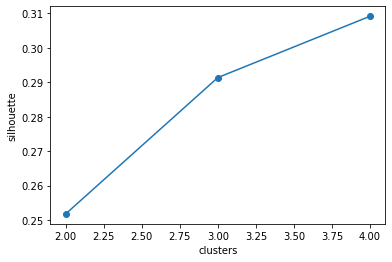

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
scores=[]
for n in range(2,min(5,dfnew.shape[0])):
  km=KMeans(n_clusters=n)
  km.fit_predict(dfnew.values)
  scores.append(silhouette_score(dfnew.values,km.labels_))
plt.plot([n for n in range(2,min(5,dfnew.shape[0]))],scores,marker='o')
plt.xlabel("clusters")
plt.ylabel("silhouette")

In [35]:
clusternum=np.argmax(scores)+2
km=KMeans(n_clusters=clusternum)
km.fit_predict(dfnew)
labels=km.labels_
df['labels']=labels
clusternum

4

In [36]:
show=df.sort_values(['distance'])
chosen=show.head(5)
chosen


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,location,phone,display_phone,distance,price,title,longitude,latitude,labels
26,voXpciEe4lRBco_PxOl-lg,calypso-hut-family-restaurant-and-bar-brampton,Calypso Hut Family Restaurant and Bar,https://s3-media1.fl.yelpcdn.com/bphoto/3do312...,False,https://www.yelp.com/biz/calypso-hut-family-re...,8,"[{'alias': 'caribbean', 'title': 'Caribbean'},...",3.5,"{'address1': '263 Queen Street E', 'address2':...",+19057903648,+1 905-790-3648,140.697092,0,Caribbean,-79.742521,43.701718,0
4,V34HqyD3NmNo_MPgW5TR5A,fine-taste-hakka-chinese-restaurant-brampton,Fine Taste Hakka Chinese Restaurant,https://s3-media1.fl.yelpcdn.com/bphoto/5tDuiH...,False,https://www.yelp.com/biz/fine-taste-hakka-chin...,6,"[{'alias': 'hakka', 'title': 'Hakka'}, {'alias...",4.5,"{'address1': '16 Kennedy Road S', 'address2': ...",+19054971883,+1 905-497-1883,761.119750,0,Hakka,-79.747400,43.695090,0
8,KHxuTxhVt0smTGngblIjSA,sunlight-chinese-food-brampton,Sunlight Chinese Food,https://s3-media3.fl.yelpcdn.com/bphoto/izi1fI...,False,https://www.yelp.com/biz/sunlight-chinese-food...,7,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",3.0,"{'address1': '63 Kennedy Road N', 'address2': ...",+19054873388,+1 905-487-3388,805.108282,1,Chinese,-79.752170,43.697140,3
14,gopA-Q9KWwC8BLIRDhusgg,singapore-garden-chinese-restaurant-brampton,Singapore Garden Chinese Restaurant,https://s3-media1.fl.yelpcdn.com/bphoto/Bbujjs...,False,https://www.yelp.com/biz/singapore-garden-chin...,21,"[{'alias': 'chinese', 'title': 'Chinese'}]",3.0,"{'address1': '226 Queen Street E', 'address2':...",+19054598610,+1 905-459-8610,851.994706,2,Chinese,-79.750610,43.694940,3
5,6q09DlOAVmOZRVSD9uMpVA,calypso-gardens-brampton,Calypso Gardens,https://s3-media4.fl.yelpcdn.com/bphoto/tzUzGh...,False,https://www.yelp.com/biz/calypso-gardens-bramp...,14,"[{'alias': 'caribbean', 'title': 'Caribbean'},...",4.5,"{'address1': '83 Kennedy Road S', 'address2': ...",+19054544477,+1 905-454-4477,1454.634489,1,Caribbean,-79.740750,43.688450,0


In [37]:
chosennames=list(chosen['name'])
chosennames

['Calypso Hut Family Restaurant and Bar',
 'Fine Taste Hakka Chinese Restaurant',
 'Sunlight Chinese Food',
 'Singapore Garden Chinese Restaurant',
 'Calypso Gardens']

In [38]:
vals=list(chosen['image_url']) 
vals

['https://s3-media1.fl.yelpcdn.com/bphoto/3do312atQe4E2RGZMxo4ww/o.jpg',
 'https://s3-media1.fl.yelpcdn.com/bphoto/5tDuiHB1L-T7ParQHeEBWQ/o.jpg',
 'https://s3-media3.fl.yelpcdn.com/bphoto/izi1fIix65vuC0ZiUl_4rw/o.jpg',
 'https://s3-media1.fl.yelpcdn.com/bphoto/BbujjsnreEe6Rca0-kxu_A/o.jpg',
 'https://s3-media4.fl.yelpcdn.com/bphoto/tzUzGhuMSU9ns0T4FLhZag/o.jpg']

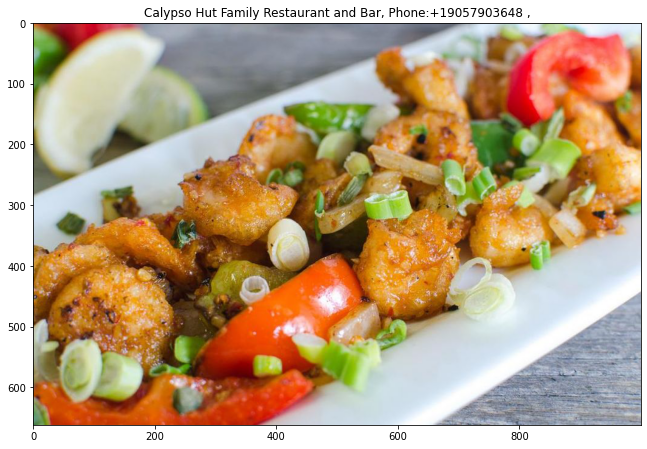

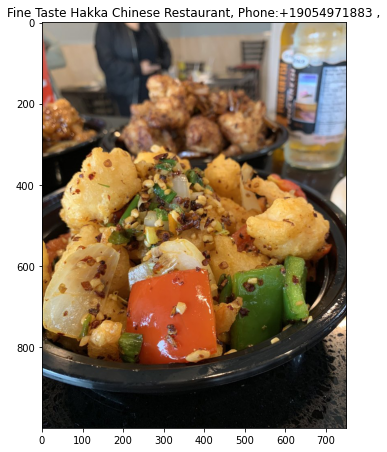

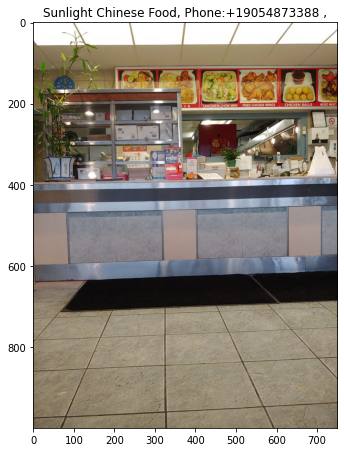

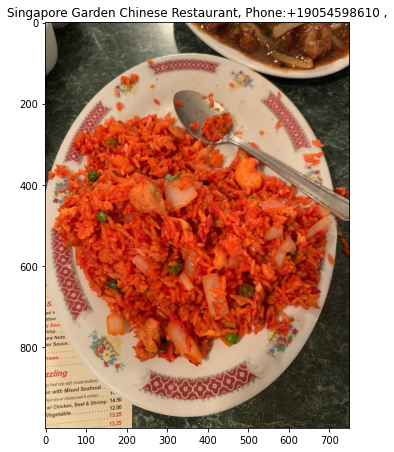

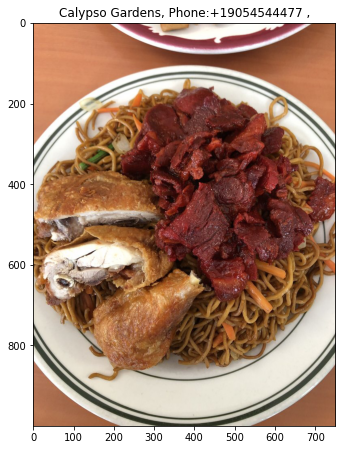

In [39]:
import PIL
import urllib.request
import io


def show(vals,details=False):

  for i,url1 in enumerate(vals):
    if url1 !='':
      plt.figure(figsize=(30,30))
      response = requests.get(url1)
      image_bytes = io.BytesIO(response.content)

      img = PIL.Image.open(image_bytes)
      plt.subplot(5,1,i+1)    # the number of images in the grid is 5*5 (25)
      plt.imshow(img)
      
        
      plt.title(f'{chosennames[i]}, Phone:{df[df["name"]==chosennames[i]]["phone"].values[0]} ,')
      plt.tight_layout()

  plt.show()
show(vals)

enter the restaurant you likeCalypso Hut Family Restaurant and Bar


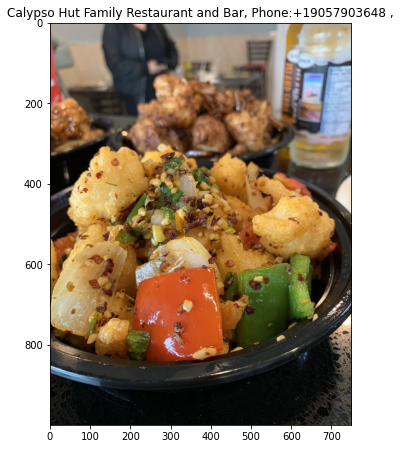

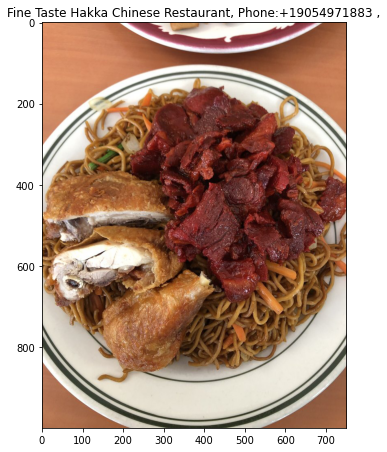

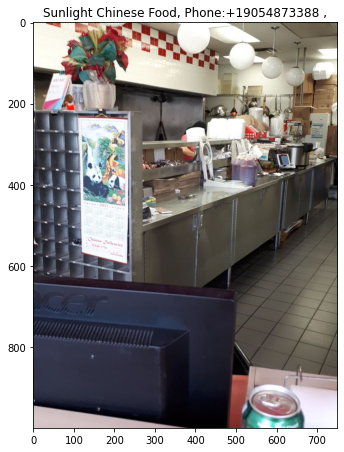

In [41]:
name=input("enter the restaurant you like")
g=df[df['name']==name]['labels']
labelthis=g.iloc[0]
new=df[df['labels']==labelthis].sort_values(by=['rating'],ascending=False)
top3=new.head(3)
vals2=list(top3['image_url'])
show(vals2,details=True)
